# zerotogbms-project

### Course Project - Real-World Machine Learning Model - Machine Learning with Python: Zero to GBMs

## Problem Statement

### The data for this challenge shows the results of a number of "trials", each one representing about 2 minutes of sequential data that are recorded every 100 ms during a driving session on the road or in a driving simulator.  The trials are samples from some 100 drivers of both genders, and of different ages and ethnic backgrounds. The files are structured as follows:

### The first column is the Trial ID - each period of around 2 minutes of sequential data has a unique trial ID. For instance, the first 1210 observations represent sequential observations every 100ms, and therefore all have the same trial ID

### The second column is the observation number - this is a sequentially increasing number within one trial ID
### The third column has a value X for each row where
### <br>               X = 1     if the driver is alert
### <br>               X = 0     if the driver is not alert
### <br>The next 8 columns with headers P1, P2 , …….., P8  represent physiological data;
### <br>The next 11 columns with headers E1, E2, …….., E11  represent environmental data;
### <br>The next 11 columns with headers V1, V2, …….., V11  represent vehicular  data

### The file 'example_submission.csv' is an example of a submission file - your submission files should be in exactly the same format, with only values in the last column ('Prediction') different. Predictions are expected to be real numbers between 0 and 1 inclusive

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
!pip install pandas matplotlib seaborn --quiet 

In [3]:
!pip install opendatasets scikit-learn --upgrade --quiet

In [4]:
import os
import jovian
import opendatasets as od
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.tree import plot_tree

In [11]:
train = pd.read_csv('./stayalert/fordTrain.csv')
test = pd.read_csv('./stayalert/fordTest.csv')

In [12]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [13]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

#### As the dataset is large, taking a small sample of the data. i.e., 2,00,000 entries of training data & 20,000 entries of testing data.

In [15]:
train = train[:200000]
test = test[:20000]

#### Dropping few columns from the dataset, because they have the same value throught out the dataset.

In [16]:
# divide the data into features and target, here x is features and y is target
x = train.drop(columns=["TrialID","V7","V9","P8", "IsAlert"], axis=1)
y = train['IsAlert']

### Preparing the data for the model

#### Scaling Numeric Features

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# getting the names of the required columns from x
req_col = [i for i in x.columns.to_list() if i != "ObsNum"]

In [19]:
# creating scaler object
scaler = MinMaxScaler()

In [20]:
# fitting the data into the scaler
scaler.fit(x[req_col])

MinMaxScaler()

In [21]:
# replacing the existing values with the new values after scaling
x[req_col] = scaler.transform(x[req_col])

In [22]:
x

,ObsNum,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,0.427060,0.662966,0.446215,0.199362,0.737452,0.128940,0.596951,0.0,0.0,0.25,0.460,0.494071,0.252964,0.05,0.111111,1.0,0.448819,0.0,0.814182,0.599156,0.653895,0.012487,0.0,0.341769,0.215781,0.5,0.036143
1,1,0.424283,0.734407,0.446215,0.199362,0.737452,0.128940,0.596951,0.0,0.0,0.25,0.460,0.494071,0.252964,0.05,0.111111,1.0,0.448819,0.0,0.814342,0.632911,0.653895,0.012487,0.0,0.342225,0.215781,0.5,0.036034
2,2,0.423614,0.769955,0.446215,0.199362,0.737452,0.131805,0.590859,0.0,0.0,0.25,0.460,0.494071,0.252964,0.05,0.111111,1.0,0.448819,0.0,0.814262,0.611814,0.653895,0.012487,0.0,0.343137,0.215781,0.5,0.036037
3,3,0.423591,0.642948,0.446215,0.199362,0.737452,0.131805,0.590859,0.0,0.0,0.25,0.460,0.494071,0.252964,0.05,0.111111,1.0,0.448819,0.0,0.814421,0.586498,0.653895,0.012487,0.0,0.344049,0.215781,0.5,0.036009
4,4,0.423505,0.760221,0.446215,0.199362,0.737452,0.131805,0.590859,0.0,0.0,0.25,0.460,0.494071,0.252964,0.05,0.111111,1.0,0.448819,0.0,0.815060,0.599156,0.653895,0.012487,0.0,0.344505,0.215781,0.5,0.036045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,580,0.450931,0.852196,0.103586,0.634539,0.162160,0.206304,0.457544,0.0,0.0,0.00,0.500,0.525692,0.359684,0.05,0.111111,1.0,0.566929,0.0,0.857941,0.578059,0.000000,0.009388,0.0,0.367761,0.135266,0.5,0.015750
199996,581,0.455924,0.547676,0.103586,0.634539,0.162160,0.206304,0.457544,0.0,0.0,0.00,0.500,0.525692,0.359684,0.05,0.111111,1.0,0.566929,0.0,0.858181,0.578059,0.000000,0.009388,0.0,0.367989,0.135266,0.5,0.015851
199997,582,0.461346,0.709482,0.103586,0.634539,0.162160,0.206304,0.457544,0.0,0.0,0.00,0.500,0.525692,0.359684,0.05,0.111111,1.0,0.566929,0.0,0.858181,0.578059,1.000000,0.009388,0.0,0.367077,0.135266,0.5,0.015985
199998,583,0.468570,0.796580,0.103586,0.634539,0.162160,0.206304,0.457544,0.0,0.0,0.00,0.500,0.525692,0.359684,0.05,0.111111,1.0,0.566929,0.0,0.858181,0.578059,1.000000,0.009388,0.0,0.367077,0.135266,0.5,0.016190


### Spinning the data into training and validation sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x, y , test_size=0.4, stratify=y, random_state=42)

In [25]:
print(x_train.shape)
print(y_train.shape)

(120000, 28)
(120000,)


In [26]:
print(x_val.shape)
print(y_val.shape)

(80000, 28)
(80000,)


### Training the model

### 1. Random Forest

In [27]:
rf_model = RandomForestClassifier(random_state=42)

In [28]:
%%time
rf_model.fit(x_train, y_train)

CPU times: user 46.4 s, sys: 114 ms, total: 46.6 s
Wall time: 56.4 s


RandomForestClassifier(random_state=42)

### Evaluation

Let's evaluate the random forest using the accuracy score.

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
rf_train_preds = rf_model.predict(x_train)

In [31]:
rf_train_preds

array([0, 1, 1, ..., 1, 1, 1])

In [32]:
pd.value_counts(rf_train_preds)

1    81309
0    38691
dtype: int64

In [33]:
rf_train_probs = rf_model.predict_proba(x_train)

In [34]:
rf_train_probs

array([[0.96, 0.04],
       [0.  , 1.  ],
       [0.08, 0.92],
       ...,
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.03, 0.97]])

Seems like the random forest is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [35]:
accuracy_score(y_train, rf_train_preds)

0.9999833333333333

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [36]:
rf_model.score(x_val, y_val)

0.988225

Although the training accuracy is 100%, the accuracy on the validation set is just about 99%, which is better without any hypertuning. 

In [37]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [38]:
len(rf_model.estimators_)

100

Random forests assign an "importance" to each feature, by combining the importance values from individual trees.

In [39]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [40]:
importance_df.head(10)

,feature,importance
16,E9,0.139474
27,V11,0.114414
17,E10,0.113206
15,E8,0.101666
14,E7,0.054850
7,P7,0.045821
6,P6,0.043837
19,V1,0.037652
13,E6,0.034677
5,P5,0.034629


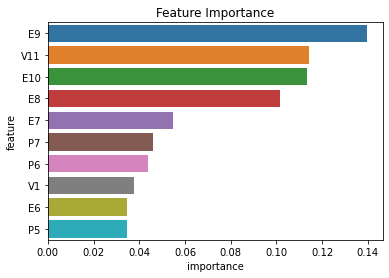

In [41]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [42]:
?RandomForestClassifier

In [43]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train, y_train)

In [44]:
base_train_acc = base_model.score(x_train, y_train)
base_val_acc = base_model.score(x_val, y_val)

In [45]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999833333333333, 0.988225)

In [46]:
rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=300, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=300, max_features=0.2, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [48]:
rf_model.score(x_train, y_train), rf_model.score(x_val, y_val)

(0.96745, 0.9604125)

In [49]:
base_accs

(0.9999833333333333, 0.988225)

Even after doing, hypertuning the random forest, the accuracy on the validation set is better in base model is better.

### Lets do the same with Decision Tree Classifier.

In [50]:
dt_model = DecisionTreeClassifier(random_state=42)

In [51]:
%%time
dt_model.fit(x_train, y_train)

CPU times: user 3.86 s, sys: 8.04 ms, total: 3.87 s
Wall time: 3.93 s


DecisionTreeClassifier(random_state=42)

In [52]:
dt_train_preds = dt_model.predict(x_train)

In [53]:
dt_train_preds

array([0, 1, 1, ..., 1, 1, 1])

In [54]:
pd.value_counts(dt_train_preds)

1    81307
0    38693
dtype: int64

The decision tree also returns probabilities for each prediction.

In [55]:
dt_train_probs = dt_model.predict_proba(x_train)

In [56]:
dt_train_probs

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [57]:
accuracy_score(y_train, dt_train_preds)

1.0

The training set accuracy is 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [58]:
dt_model.score(x_val, y_val)

0.9771125

Although the training accuracy is 100%, the accuracy on the validation set is just about 97%, which is better before any hypertuning.

### Visualisation

In [59]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'E9 <= 0.5\ngini = 0.437\nsamples = 120000\nvalue = [38693, 81307]'),
 Text(0.25, 0.625, 'E7 <= 0.025\ngini = 0.021\nsamples = 16371\nvalue = [16199, 172]'),
 Text(0.125, 0.375, 'E3 <= 0.125\ngini = 0.488\nsamples = 191\nvalue = [110, 81]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'E6 <= 0.219\ngini = 0.011\nsamples = 16180\nvalue = [16089, 91]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'V11 <= 0.012\ngini = 0.34\nsamples = 103629\nvalue = [22494, 81135]'),
 Text(0.625, 0.375, 'E8 <= 0.167\ngini = 0.486\nsamples = 40149\nvalue = [16759, 23390]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'V1 <= 0.008\ngini = 0.164\nsamples = 63480\nvalue = [5735, 57745]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

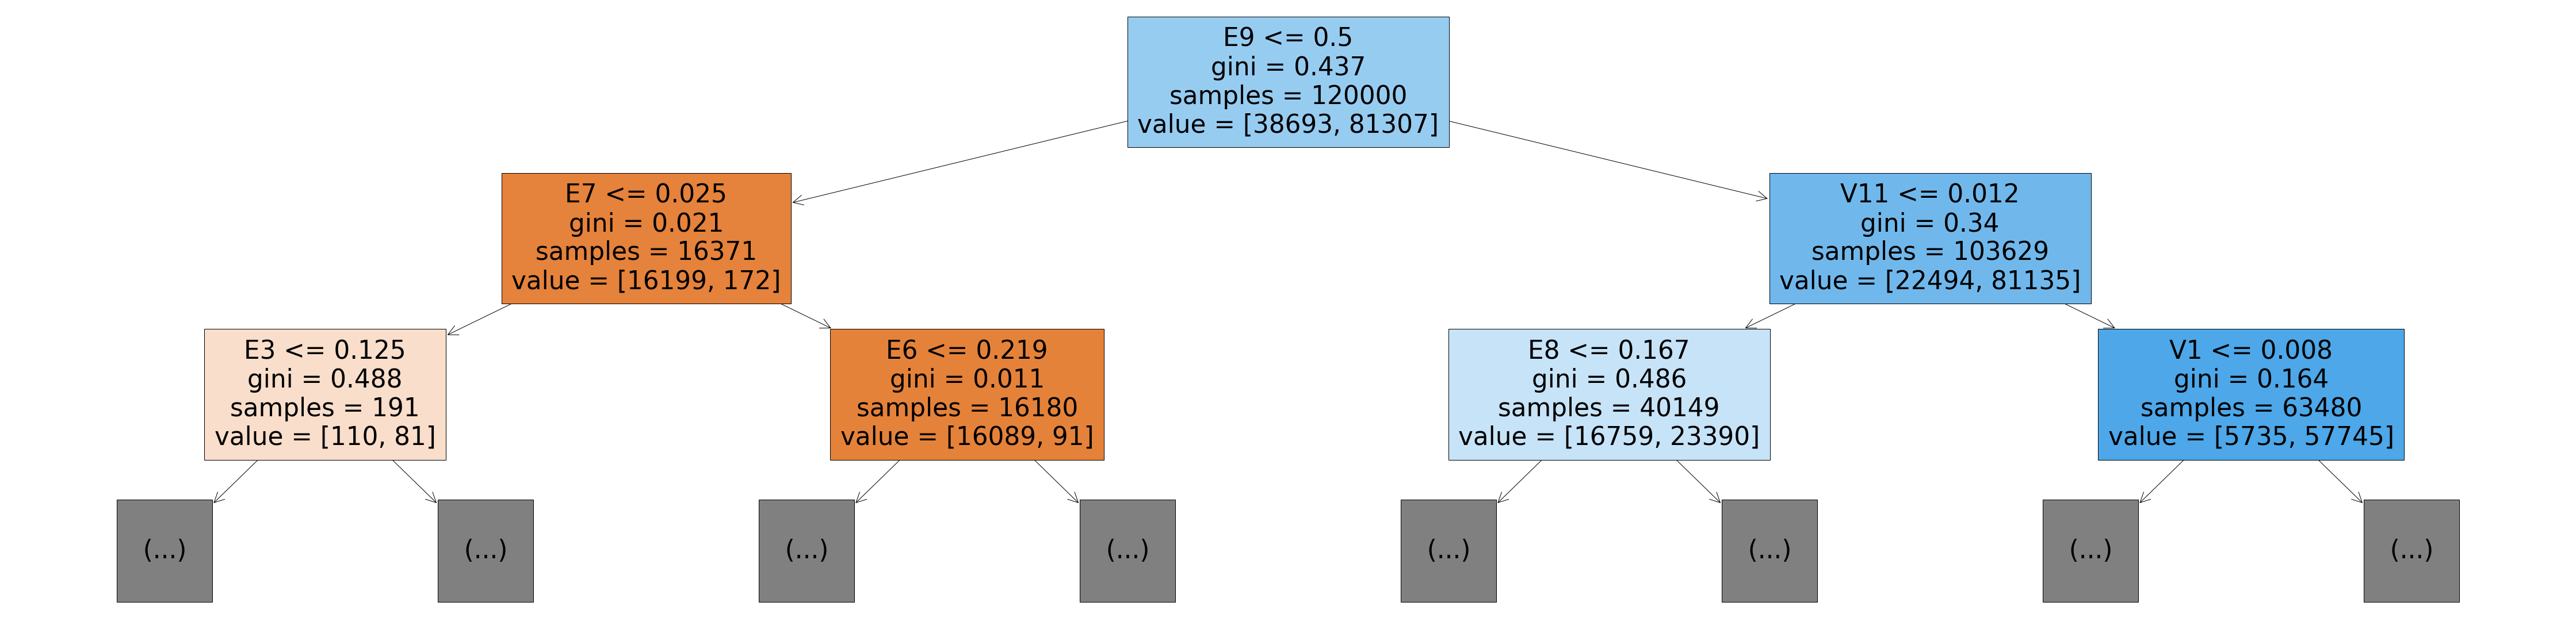

In [60]:
plt.figure(figsize=(80,20))
plot_tree(dt_model, feature_names=x_train.columns, max_depth=2, filled=True)

In [61]:
dt_model.tree_.max_depth

44

In [62]:
tree_text = export_text(dt_model, max_depth=10, feature_names=list(x_train.columns))
print(tree_text[:5000])

|--- E9 <= 0.50
|   |--- E7 <= 0.03
|   |   |--- E3 <= 0.12
|   |   |   |--- class: 0
|   |   |--- E3 >  0.12
|   |   |   |--- E5 <= 0.52
|   |   |   |   |--- P7 <= 0.56
|   |   |   |   |   |--- ObsNum <= 816.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ObsNum >  816.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- P7 >  0.56
|   |   |   |   |   |--- V8 <= 0.24
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V8 >  0.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- E5 >  0.52
|   |   |   |   |--- class: 0
|   |--- E7 >  0.03
|   |   |--- E6 <= 0.22
|   |   |   |--- E8 <= 0.28
|   |   |   |   |--- V2 <= 0.55
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- V2 >  0.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- E8 >  0.28
|   |   |   |   |--- E6 <= 0.02
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- E6 >  0.02
|   |   |   |   |   |--- V6 <= 0.36
|   |   |   |   |   |   |--- E8 <= 0.94
|   |   |   |   |   |   | 

In [63]:
dt_model.feature_importances_

array([3.88315417e-02, 3.29124337e-02, 2.94254653e-03, 6.49319079e-03,
       5.67958702e-03, 2.23774880e-02, 9.75007561e-03, 2.44697807e-02,
       1.58062417e-02, 2.86205570e-02, 1.14326632e-03, 1.83329899e-02,
       4.82002555e-02, 2.79120373e-02, 5.95101352e-03, 8.97252482e-02,
       3.21747639e-01, 4.03106513e-02, 2.56236753e-03, 4.42865636e-02,
       8.36386676e-03, 2.92265899e-03, 1.45874365e-02, 2.81445678e-04,
       1.80778678e-02, 1.19720118e-02, 4.25939314e-04, 1.55313298e-01])

In [64]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

In [65]:
importance_df.head(10)

,feature,importance
16,E9,0.321748
27,V11,0.155313
15,E8,0.089725
12,E5,0.048200
19,V1,0.044287
17,E10,0.040311
0,ObsNum,0.038832
1,P1,0.032912
9,E2,0.028621
13,E6,0.027912


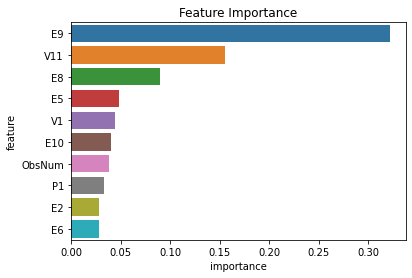

In [66]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Hypertuning the decision tree

In [67]:
?DecisionTreeClassifier

Validation Graph

In [68]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    val_acc = 1 - model.score(x_val, y_val)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 51)])

In [ ]:
errors_df

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
model = DecisionTreeClassifier(max_depth=45, random_state=42).fit(x_train, y_train)
model.score(x_val, y_val)

#### After comparing the two models, we can see that the random forest model is much better than the decision tree model with a better accuracy of 98.8% on the validation set.

Now let's run the random forest model on test dataset and check the accuracy with the predictions in solution dataset given.

In [ ]:
test

In [ ]:
# lets drop the columns that are not important
test = test.drop(columns=["TrialID","V7","V9","P8", "IsAlert"], axis=1)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train,y_train)

In [ ]:
train_preds = model.predict(x_train)

In [ ]:
train_preds

In [ ]:
accuracy_score(y_train, train_preds)

In [ ]:
# scale the test data
scaler.fit(test[req_col])

In [ ]:
test[req_col] = scaler.transform(test[req_col])

In [ ]:
# predict the test data
test_preds = model.predict(test)

In [ ]:
test_preds

In [ ]:
# now let's create a solution dataframe to store the predicted values
sol_df = pd.read_csv("./stayalert/Solution.csv")
sol_df = sol_df['Prediction'][:20000]

In [ ]:
accuracy_score(sol_df, test_preds)